$\Large\textbf{Welcome to IE 684 (Spring 2021-22)}$  

$\large\textbf{Lab 1 Exercise 1. }$

We will start with a procedure which helps to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

Note that the gradient of $f(\mathbf{x})$ is given by:

$
\nabla f(\mathbf{x}) = \begin{bmatrix} \frac{\partial f(\mathbf{x})}{\partial x_1} \\ \frac{\partial f(\mathbf{x})}{\partial x_2}\end{bmatrix}. 
$

We will use the following gradient descent type algorithm: 

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$, Steplength $\eta$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}


In [219]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [220]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray 
  assert len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [221]:
#check whether you can pass arbitrary arguments to evalf 
#my_x = [1,3] #Note: my_x is a list of 2 elements, but not a numpy array
#print('f(my_x) is:',evalf(my_x))

In [222]:
# First we will create a numpy array of size 2
my_x = np.array([1,2])
print('type of my_x',type(my_x), 'length of my_x:',len(my_x)) #verify if my_x is indeed a numpy array of size 2


type of my_x <class 'numpy.ndarray'> length of my_x: 2


In [223]:
#now call evalf (x) with my_x as argument and check if it works
print(evalf(my_x))

10730


In [224]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [225]:
def find_minimizer(start_x, tol, step_length):
  global k
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0
  

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, fvals 


In [226]:
my_start_x = np.array([10,10])
my_steplength = 0.1
my_tol= 1e-3 #10^{-3} or 0.001
opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
print('Optimizer:',opt_x)

Optimizer: [-99.99958844  24.99994388]


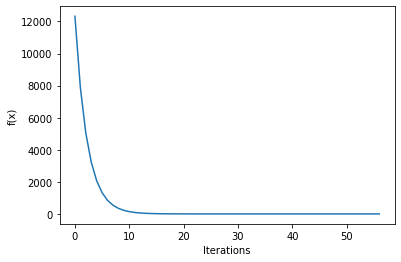

In [227]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(fvals_ret)
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.show()

#2. [R] What is the minimizer and minimum function value of f(x) = f(x1, x2) = (x1 + 100)2 + (x2 − 25)2
?

In [228]:
minimizer = np.array([-99.99958844,24.99994388])
print(evalf(minimizer))

1.725310880028136e-07


#Answer) the minimizer is : [-99.99958844  24.99994388] and minimum value is 1.725310880028136e-07 is near equal to 0.


3)With starting point x
0 = (10, 10) and η = 0.1, we will now study the behavior of the algorithm for different
tolerance values. Try τ = 10−p where p = 1, 2, . . . , 10. For each τ , record the final minimizer, final objective
function value and number of iterations taken by the algorithm to terminate. Prepare a plot where the number
of iterations is plotted against τ values. Comment on the observations. Comment about the minimizers and
objective function values obtained for different choices of the tolerance values.

In [229]:
tolerance_value = []
for i in range(1,11):
  tolerance_value.append(10**(-i))
tolerance_value


[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10]

In [230]:
final_minimizer = []
final_objective = []
no_of_iteration = []
for j in tolerance_value:
  my_tol = j
  opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
  final_minimizer.append(opt_x)
  final_objective.append(evalf(opt_x))
  no_of_iteration.append(k)



In [231]:
print("final minimzer = ",final_minimizer)
print("final objective = ",final_objective)
print("no of iteration = ",no_of_iteration)

final minimzer =  [array([-99.9553787 ,  24.99391528]), array([-99.99520882,  24.99934666]), array([-99.99958844,  24.99994388]), array([-99.99995581,  24.99999397]), array([-99.99999526,  24.99999935]), array([-99.99999959,  24.99999994]), array([-99.99999996,  24.99999999]), array([-100.,   25.]), array([-100.,   25.]), array([-100.,   25.])]
final objective =  [0.0020280843668995063, 2.3382220797474075e-05, 1.7253033717248775e-07, 1.989139359193299e-09, 2.293321544605827e-11, 1.6921726745458407e-13, 1.950942200128245e-15, 2.249273021138356e-17, 1.6597088735501767e-19, 1.9135732950098918e-21]
no of iteration =  [35, 45, 56, 66, 76, 87, 97, 107, 118, 128]


In [232]:
import pandas as pd

In [233]:
data = pd.DataFrame(columns = ["final minimizer","final objective","no of iteration"])
data["final minimizer"] = final_minimizer
data["final objective"] = final_objective
data["no of iteration"] = no_of_iteration

In [234]:
data

final minimizer  final objective  no of iteration
0  [-99.95537869887195, 24.993915277118905]     2.028084e-03               35
1   [-99.99520882427376, 24.99934665785551]     2.338222e-05               45
2  [-99.99958844113893, 24.999943878337128]     1.725303e-07               56
3  [-99.99995580920378, 24.999993973982335]     1.989139e-09               66
4  [-99.99999525504938, 24.999999352961282]     2.293322e-11               76
5    [-99.99999959241184, 24.9999999444198]     1.692173e-13               87
6   [-99.99999995623556, 24.99999999403212]     1.950942e-15               97
7    [-99.99999999530084, 24.9999999993592]     2.249273e-17              107
8  [-99.99999999959634, 24.999999999944954]     1.659709e-19              118
9   [-99.99999999995666, 24.99999999999409]     1.913573e-21              128

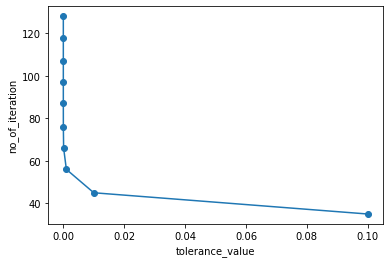

In [235]:
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(tolerance_value,no_of_iteration)
plt.scatter(tolerance_value,no_of_iteration)
plt.xlabel('tolerance_value')
plt.ylabel("no_of_iteration")
plt.show()

#3)obsevation
as the tolerance value is increases the no of iteration decreases. at the near the tolerance value 0 the no of iteration is more than the other point.

#4. [R] With starting point x
0 = (10, 10) and τ = 10−5
, we will study the behavior of the algorithm for different
step length values. Try η ∈ {0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9}. For each η, record the final
minimizer, final objective function value and number of iterations taken by the algorithm to terminate. Prepare
a plot where the number of iterations is plotted against η values. Comment on the observations. Comment
about the minimizers and objective function values obtained for different choices of the step length values.

In [236]:
final_minimizer = []
final_objective = []
no_of_iteration = []
step_length = [0.0001,0.001,0.01,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9]
for i in step_length:
  my_tol = 10**(-5)
  opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, i)
  final_minimizer.append(opt_x)
  final_objective.append(evalf(opt_x))
  no_of_iteration.append(k)



In [237]:
print("final minimzer",final_minimizer)
print("final objective",final_objective)
print("no of iteration ",no_of_iteration)

final minimzer [array([-99.99999505,  24.99999932]), array([-99.99999505,  24.99999933]), array([-99.99999512,  24.99999933]), array([-99.99999526,  24.99999935]), array([-99.99999685,  24.99999957]), array([-99.99999775,  24.99999969]), array([-100.,   25.]), array([-100.00000225,   25.00000031]), array([-100.00000302,   25.00000041]), array([-99.99999685,  24.99999957]), array([-99.99999526,  24.99999935])]
final objective [2.49936770204995e-11, 2.494219709847674e-11, 2.4304673044883465e-11, 2.293321544605827e-11, 1.011747066175869e-11, 5.169479687800271e-12, 0.0, 5.169479687800271e-12, 9.312506683476372e-12, 1.011747066175869e-11, 2.293321544605827e-11]
no of iteration  [84571, 8450, 838, 76, 34, 11, 1, 11, 19, 34, 76]


In [238]:
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(step_length,no_of_iteration)
plt.scatter(step_length,no_of_iteration)
plt.xlabel('step_length')
plt.ylabel("no_of_iteration")
plt.show()

#4) as the step length is increases than no of iteration is decreses. here we can that at near the zero the no of iteration is more than the other point. as point 0.2 to 1 it seems like a constant. 

In [239]:
data1 = pd.DataFrame(columns = ["final minimizer","final objective","no of iteration"])
data1["final minimizer"] = final_minimizer
data1["final objective"] = final_objective
data1["no of iteration"] = no_of_iteration
data1

final minimizer  final objective  no of iteration
0    [-99.9999950464757, 24.999999324519383]     2.499368e-11            84571
1   [-99.99999505157976, 24.999999325215427]     2.494220e-11             8450
2   [-99.99999511523008, 24.999999333895012]     2.430467e-11              838
3   [-99.99999525504938, 24.999999352961282]     2.293322e-11               76
4    [-99.9999968483702, 24.999999570232298]     1.011747e-11               34
5            [-99.9999977472, 24.9999996928]     5.169480e-12               11
6                             [-100.0, 25.0]     0.000000e+00                1
7           [-100.0000022528, 25.0000003072]     5.169480e-12               11
8   [-100.00000302365697, 25.00000041231686]     9.312507e-12               19
9    [-99.9999968483702, 24.999999570232298]     1.011747e-11               34
10  [-99.99999525504938, 24.999999352961282]     2.293322e-11               76

#5. [R] With τ = 10−5 and η = 0.1, we will study the behavior of the algorithm for different starting points.
Consider x0 ∈ {(10000, 10000), (500, 0), (0, 1000), (1, 1), (−500,−2)}. Prepare a table listing the final minimizer,
final objective function value and number of iterations taken by the algorithm to terminate for the different
starting points. Comment on your observations.

In [240]:
final_minimizer = []
final_objective = []
no_of_iteration = []
start =[[10000, 10000], [500, 0], [0, 1000], [1, 1],[-500,-2]]
for start_x in start:
  my_tol = 10**(-5)
  my_steplength = 0.1
  opt_x, fvals_ret = find_minimizer(np.array(start_x), my_tol,my_steplength)
  final_minimizer.append(opt_x)
  final_objective.append(evalf(opt_x))
  no_of_iteration.append(k)

  

In [241]:
print("final minimzer",final_minimizer)
print("final objective",final_objective)
print("no of iteration ",no_of_iteration)

final minimzer [array([-99.99999679,  25.00000317]), array([-99.99999566,  24.99999982]), array([-99.99999954,  25.00000452]), array([-99.99999564,  24.99999896]), array([-100.00000452,   24.99999969])]
final objective [2.0414342669998657e-11, 1.888746375147865e-11, 2.060780080476227e-11, 2.0052840841640608e-11, 2.055190630073527e-11]
no of iteration  [98, 84, 86, 76, 82]


In [242]:
data2 = pd.DataFrame(columns = ["start","final minimizer","final objective","no of iteration"])
data2["start"] = start
data2["final minimizer"] = final_minimizer
data2["final objective"] = final_objective
data2["no of iteration"] = no_of_iteration
data2

start                           final minimizer  final objective  \
0  [10000, 10000]    [-99.9999967853026, 25.00000317491154]     2.041434e-11   
1        [500, 0]  [-99.99999565779666, 24.999999819074862]     1.888746e-11   
2       [0, 1000]  [-99.99999953683165, 25.000004515891483]     2.060780e-11   
3          [1, 1]  [-99.99999564327261, 24.999998964738047]     2.005284e-11   
4      [-500, -2]  [-100.0000045231285, 24.999999694688828]     2.055191e-11   

   no of iteration  
0               98  
1               84  
2               86  
3               76  
4               82

#5) Observation

Herew we can this as that no of iteration is increses as final objerctiver is also increases.but it not always linear.